Advance Regression Assignment
Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia


### Objectives of the Case Study

-Modeling the cost of homes using the relevant independent variables is necessary.
The management will then utilise this model to determine exactly how the prices fluctuate depending on the factors.

-As a result, they may influence the company's strategy and concentrate on areas that will provide large profits.
The tool will also help management better understand how prices change in a new market. 

In [243]:
# EDA Lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Reg
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import metrics
# importing warning package to ignore the warnings
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

## Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the housing dataset

In [244]:
house = pd.read_csv(r"C:\Users\nishthc\Downloads\train.csv")
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [245]:
house.shape

(1460, 81)

In [246]:
house.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [247]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Missing data check

In [248]:
#Checking the Null values

house.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [249]:
# Checking if there are columns with one value e can drop as  it won't affect our analysis
house.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         663
Length: 81, dtype: int64

In [250]:
# Removing identifier field
house.drop(['Id'], axis=1, inplace=True)

In [251]:
# Dropping duplicate values in dataset, if exist
house = house.drop_duplicates()

In [252]:
house.shape

(1460, 80)

In [253]:
#Checking the value count

house.PoolArea.value_counts()

0      1453
512       1
648       1
576       1
555       1
480       1
519       1
738       1
Name: PoolArea, dtype: int64

In [254]:
house.PoolQC.value_counts()

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

In [255]:
house.Alley.value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [256]:
house.Street.value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [257]:
house.Utilities.value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In all above cases null is present instead of 'NA' and we might have to impute it. Because as per data dictonary these are only possible values

### Data Preparation 

In [258]:
## Checking the percentage of Null values

df_missing=pd.DataFrame((round(100*(house.isnull().sum()/len(house.index)), 2)), columns=['missing_val'])
df_missing.sort_values(by=['missing_val'], ascending=False).head(20)

,missing_val
PoolQC,99.52
MiscFeature,96.30
Alley,93.77
Fence,80.75
FireplaceQu,47.26
LotFrontage,17.74
GarageYrBlt,5.55
GarageCond,5.55
GarageType,5.55
GarageFinish,5.55


As seem above PoolQC, Alley Fence etc null is filled instead of 'NA'

In [259]:
# Treating the NaN Values
house['PoolQC'] = house['PoolQC'].fillna('No_Pool')
house['MiscFeature'] = house['MiscFeature'].fillna('None')
house['Alley'] = house['Alley'].fillna('No_Alley_Access')
house['Fence'] = house['Fence'].fillna('No_Fence')
house['FireplaceQu'] = house['FireplaceQu'].fillna('No_Fireplace')
house['GarageYrBlt'] = house['GarageYrBlt'].fillna(0)
house['MasVnrType'] = house['MasVnrType'].fillna('None')
house['MasVnrArea'] = house['MasVnrArea'].fillna(0)
house['MasVnrArea'] = house['MasVnrArea'].fillna(0)
house['Electrical'] = house['Electrical'].fillna("Other")

In [260]:
df_missing=pd.DataFrame((round(100*(house.isnull().sum()/len(house.index)), 2)), columns=['missing_val'])
df_missing.sort_values(by=['missing_val'], ascending=False).head(20)

,missing_val
LotFrontage,17.74
GarageFinish,5.55
GarageQual,5.55
GarageCond,5.55
GarageType,5.55
BsmtFinType2,2.60
BsmtExposure,2.60
BsmtCond,2.53
BsmtQual,2.53
BsmtFinType1,2.53


In [262]:
house.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [263]:
house['LotFrontage'] = house.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

In [264]:
# Imputing the Nan Values with 'No Basementh_data'
for col in ('BsmtFinType1', 'BsmtFinType2', 'BsmtExposure', 'BsmtQual','BsmtCond'):
    house[col] = house[col].fillna('No_Basement')

In [265]:
#Imputing the NaN values with 'no garage' 
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    house[col] = house[col].fillna('No_Garage')

In [266]:
df_missing=pd.DataFrame((round(100*(house.isnull().sum()/len(house.index)), 2)), columns=['missing_val'])
df_missing.sort_values(by=['missing_val'], ascending=False).head(20)

,missing_val
MSSubClass,0.0
MSZoning,0.0
GarageYrBlt,0.0
GarageType,0.0
FireplaceQu,0.0
Fireplaces,0.0
Functional,0.0
TotRmsAbvGrd,0.0
KitchenQual,0.0
KitchenAbvGr,0.0


In [267]:
def remove_outliers(x,y):
    q1 = x[y].quantile(0.25)
    q3 = x[y].quantile(0.75)
    value = q3-q1
    lower_value  = q1-1.5*value
    higer_value = q3+1.5*value
    out= x[(x[y]<higer_value) & (x[y]>lower_value)]
    return out

In [269]:
house.shape

(1460, 80)

### EDA

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

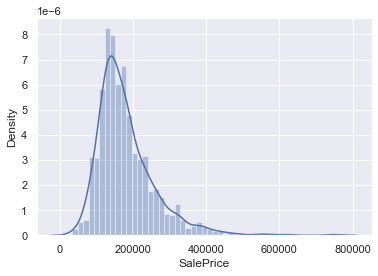

In [270]:
sns.distplot(house['SalePrice'])

In [271]:
#Since the Saleprice figures are skewed towards left, we will apply the log transformation to obtain a centralized data
#Log Transformation
house['SalePrice']=np.log1p(house['SalePrice'])

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

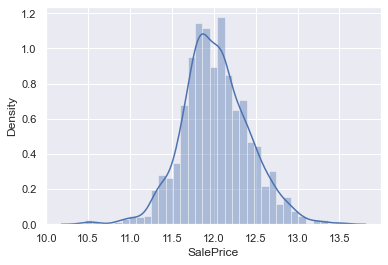

In [272]:
sns.distplot(house['SalePrice'])

<AxesSubplot:xlabel='SalePrice'>

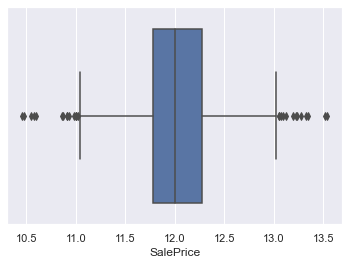

In [273]:
sns.boxplot(x='SalePrice', data=house)

Text(0.5, 1.0, 'Veneer Area')

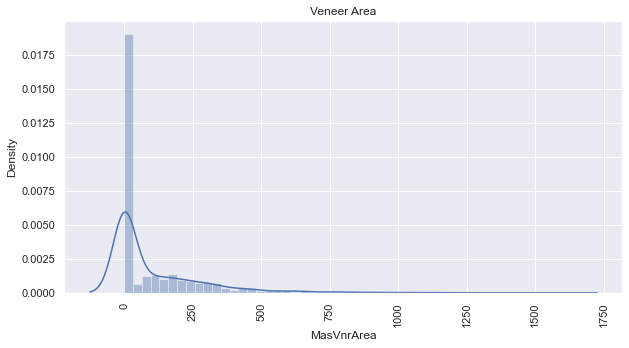

In [274]:
# plotting a distplot 
plt.figure(figsize = (10,5))
sns.distplot(house['MasVnrArea']).tick_params(axis='x', rotation = 90)
plt.title('Veneer Area')

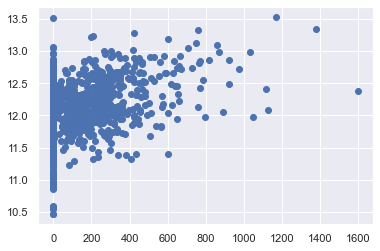

In [275]:
plt.scatter(house.MasVnrArea,house.SalePrice)

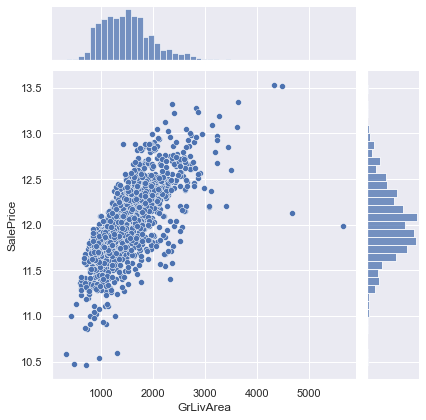

In [276]:
sns.jointplot(x='GrLivArea', y='SalePrice', data=house)
plt.show()

In [277]:
# Removing some outliers on lower right side of 'GrLivArea'
data = remove_outliers(house,'GrLivArea')

<AxesSubplot:xlabel='GrLivArea', ylabel='Density'>

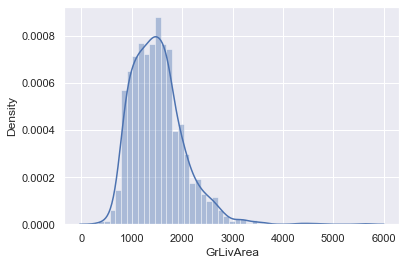

In [278]:
sns.distplot(house['GrLivArea'])

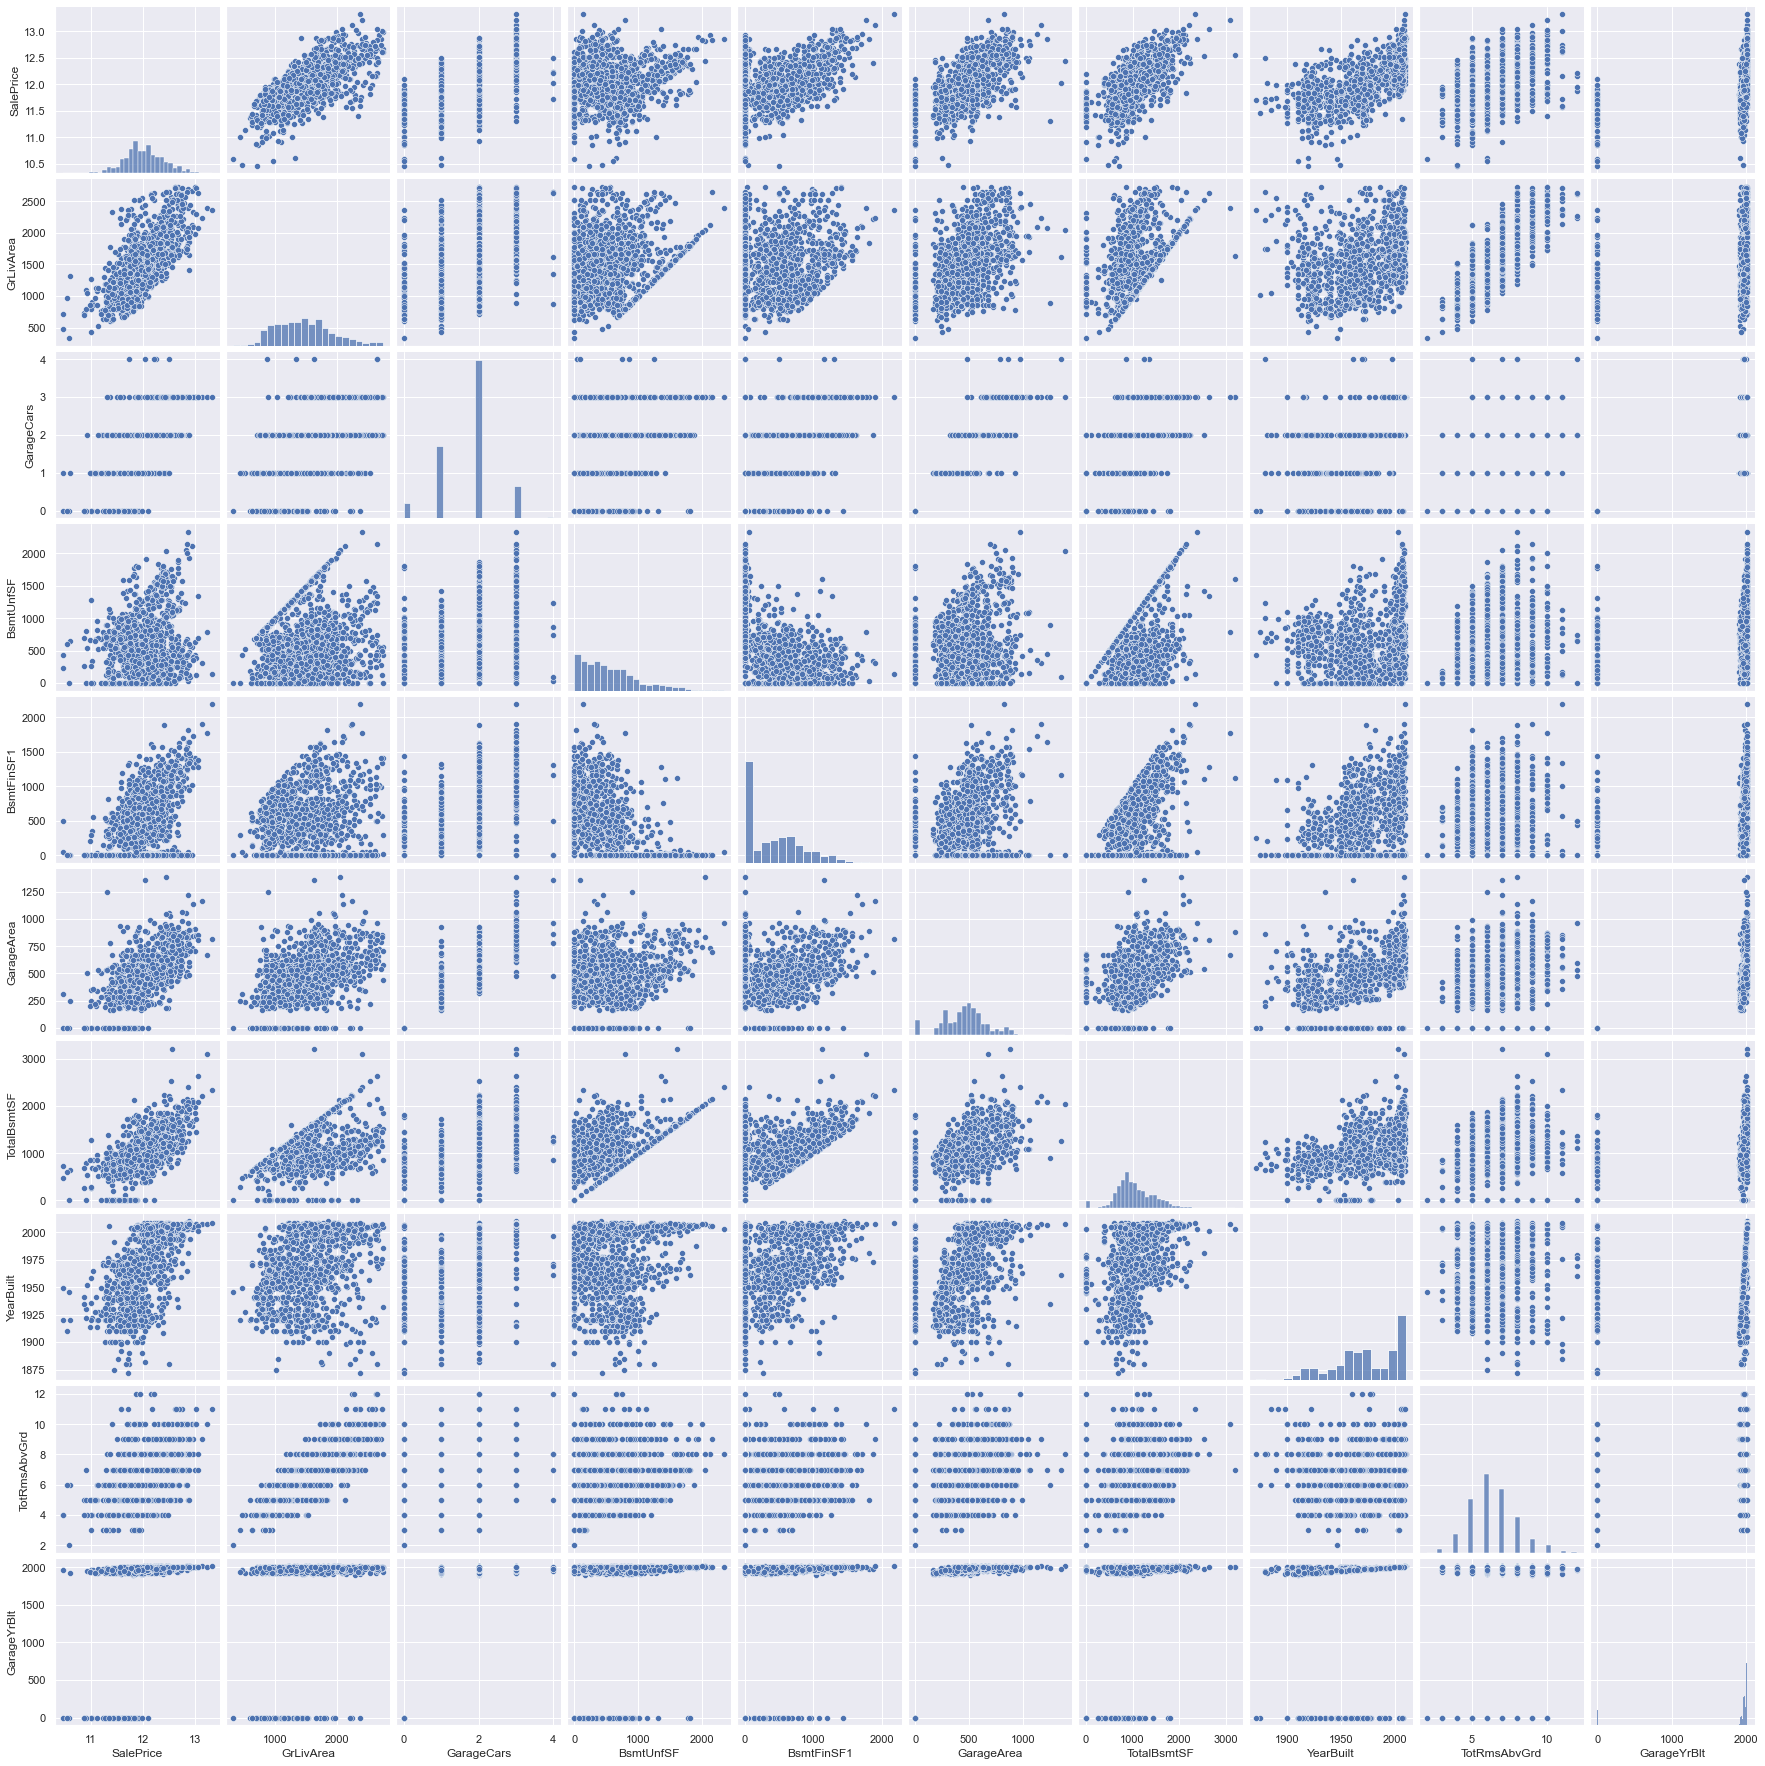

In [279]:
#scatterplot
sns.set()
cols = ['SalePrice', 'GrLivArea', 'GarageCars', 'BsmtUnfSF', 'BsmtFinSF1', 'GarageArea', 'TotalBsmtSF', 'YearBuilt', 'TotRmsAbvGrd', 'GarageYrBlt']
sns.pairplot(data[cols], size = 2.5)
plt.show()



Text(0.5, 1.0, 'Basement Condition')

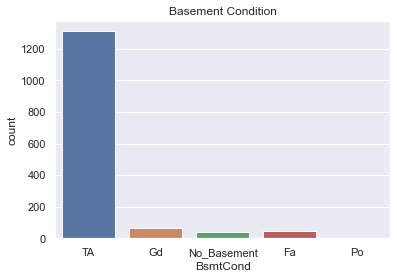

In [280]:
## Checking Basement counts
sns.countplot(x='BsmtCond', data= house)
plt.title('Basement Condition')

Text(0.5, 1.0, 'Overall Condition')

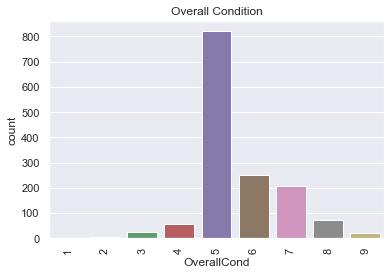

In [281]:
sns.countplot(x='OverallCond', data= house).tick_params(axis='x', rotation = 90)
plt.title('Overall Condition')

Text(0.5, 1.0, 'Overall Quality vs SalePrice')

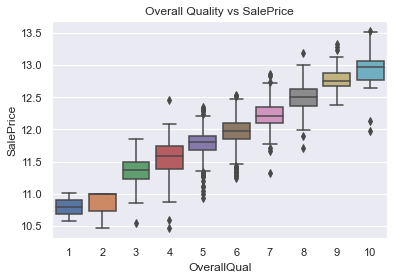

In [282]:
sns.boxplot(x='OverallQual', y='SalePrice', data=house)
plt.title("Overall Quality vs SalePrice")

Text(0.5, 1.0, 'Correlation matrix ')

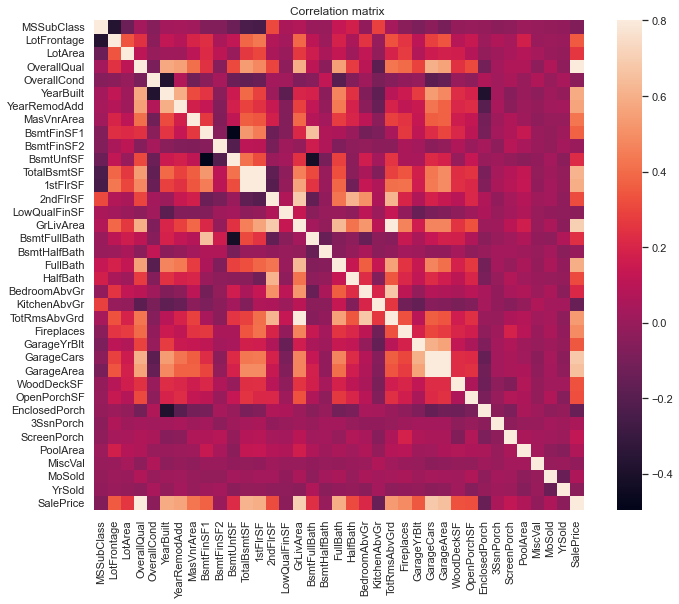

In [283]:
#checjing the correlation matrix
corr_matrix = house.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr_matrix, vmax=.8, square=True);
plt.title("Correlation matrix ")

In [286]:
#Drop columns that are correlated 
house = house.drop(['GarageCars'], axis = 1)
house = house.drop(['BsmtUnfSF'], axis = 1)
house = house.drop(['TotRmsAbvGrd'], axis = 1)
house = house.drop(['GarageYrBlt'], axis = 1)  

Deriving Variables

In [284]:
# PropertyAge -  Property Age from yearsold - yearbuilt
house['PropertyAge'] = (house['YrSold'] - house['YearBuilt'])
house.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,PropertyAge
0,60,RL,65.0,8450,Pave,No_Alley_Access,Reg,Lvl,AllPub,Inside,...,No_Pool,No_Fence,None,0,2,2008,WD,Normal,12.247699,5
1,20,RL,80.0,9600,Pave,No_Alley_Access,Reg,Lvl,AllPub,FR2,...,No_Pool,No_Fence,None,0,5,2007,WD,Normal,12.109016,31
2,60,RL,68.0,11250,Pave,No_Alley_Access,IR1,Lvl,AllPub,Inside,...,No_Pool,No_Fence,None,0,9,2008,WD,Normal,12.317171,7
3,70,RL,60.0,9550,Pave,No_Alley_Access,IR1,Lvl,AllPub,Corner,...,No_Pool,No_Fence,None,0,2,2006,WD,Abnorml,11.849405,91
4,60,RL,84.0,14260,Pave,No_Alley_Access,IR1,Lvl,AllPub,FR2,...,No_Pool,No_Fence,None,0,12,2008,WD,Normal,12.429220,8


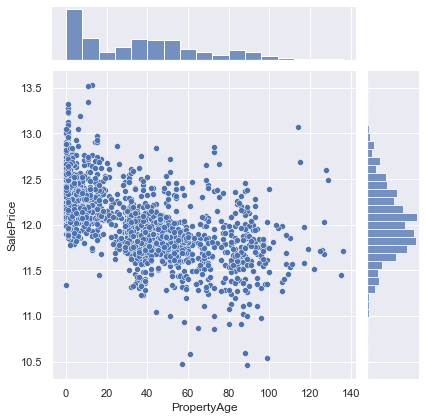

In [285]:
# PropAge vs SalePrice
sns.jointplot(x = house['PropertyAge'], y = house['SalePrice'])
plt.show()
#with increase in age rates are declining

In [287]:
#drop the column Month sold and Year Sold, Year built and Year remodelled since it will not be required further
house = house.drop(['MoSold'], axis = 1)
house = house.drop(['YrSold'], axis = 1)
house = house.drop(['YearBuilt'], axis = 1)
house = house.drop(['YearRemodAdd'], axis = 1)

# We can also drop columns that show very low variance and thus not required for predictions
house = house.drop(['Street'], axis = 1)
house = house.drop(['Utilities'], axis = 1)

house.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,SaleType,SaleCondition,SalePrice,PropertyAge
0,60,RL,65.0,8450,No_Alley_Access,Reg,Lvl,Inside,Gtl,CollgCr,...,0,0,No_Pool,No_Fence,None,0,WD,Normal,12.247699,5
1,20,RL,80.0,9600,No_Alley_Access,Reg,Lvl,FR2,Gtl,Veenker,...,0,0,No_Pool,No_Fence,None,0,WD,Normal,12.109016,31
2,60,RL,68.0,11250,No_Alley_Access,IR1,Lvl,Inside,Gtl,CollgCr,...,0,0,No_Pool,No_Fence,None,0,WD,Normal,12.317171,7
3,70,RL,60.0,9550,No_Alley_Access,IR1,Lvl,Corner,Gtl,Crawfor,...,0,0,No_Pool,No_Fence,None,0,WD,Abnorml,11.849405,91
4,60,RL,84.0,14260,No_Alley_Access,IR1,Lvl,FR2,Gtl,NoRidge,...,0,0,No_Pool,No_Fence,None,0,WD,Normal,12.429220,8


In [288]:
house.shape

(1460, 71)

In [289]:
num = house.select_dtypes(include = ['float64','int64'])
num.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice', 'PropertyAge'],
      dtype='object')

In [290]:
for i in num:
    print(house[i].value_counts())

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64
60.0     152
80.0     112
70.0      94
65.0      74
73.0      70
        ... 
137.0      1
140.0      1
38.0       1
150.0      1
46.0       1
Name: LotFrontage, Length: 115, dtype: int64
7200     25
9600     24
6000     17
9000     14
8400     14
         ..
14601     1
13682     1
4058      1
17104     1
9717      1
Name: LotArea, Length: 1073, dtype: int64
5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64
5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: OverallCond, dtype: int64
0.0      869
180.0      8
72.0       8
108.0      8
120.0      7
        ... 
562.0      1
89.0       1
921.0      1
762.0      1
119.0      1
Name: MasVnrArea, Length: 327, dtype: int64
0       46

In [291]:
cat = house.select_dtypes(include = ['object'])
cat.columns

Index(['MSZoning', 'Alley', 'LotShape', 'LandContour', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [292]:
# Listing distinct variables for each Categorical columns to address issues if any
for col in cat:
    print(col,' : ',house[col].unique())

for i in cat:
    print(house[i].value_counts())

MSZoning  :  ['RL' 'RM' 'C (all)' 'FV' 'RH']
Alley  :  ['No_Alley_Access' 'Grvl' 'Pave']
LotShape  :  ['Reg' 'IR1' 'IR2' 'IR3']
LandContour  :  ['Lvl' 'Bnk' 'Low' 'HLS']
LotConfig  :  ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope  :  ['Gtl' 'Mod' 'Sev']
Neighborhood  :  ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1  :  ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2  :  ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType  :  ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle  :  ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
RoofStyle  :  ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
RoofMatl  :  ['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']
Exterior1st  :  ['V

In [293]:
#There were several null values in these columns, some of which were imputed.It was discovered after imputing that the data had relatively minimal variance.So we have decided to drop these columns. 
house = house.drop(['PoolQC','MiscVal', 'Alley', 'RoofMatl', 'Condition2', 'Heating', 'GarageCond', 'Fence', 'Functional' ], axis = 1)

In [294]:
house.shape

(1460, 62)

converting categorical variable with only 2 values into binary

In [295]:
# mapping it to 0 and 1
#house['Street'] = house['Street'].apply(lambda x: 1 if x == 'Pave' else 0 )

house['CentralAir'] = house['CentralAir'].apply(lambda x : 1 if x == 'Y' else 0)
                                                  
house['PavedDrive'] = house['PavedDrive'].apply(lambda x : 1 if x == 'Y' else 0)        


In [298]:
cat = house.select_dtypes(include = ['object'])
cat.columns

Index(['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'HeatingQC', 'Electrical', 'KitchenQual', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'MiscFeature', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [299]:
house1 = house
house1.shape

(1460, 62)

In [300]:
# convert into dummies
df = pd.get_dummies(house, drop_first=True )
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,CentralAir,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,196.0,706,0,856,1,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,0.0,978,0,1262,1,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,162.0,486,0,920,1,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,0.0,216,0,756,1,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,350.0,655,0,1145,1,...,0,0,0,0,1,0,0,0,1,0


In [309]:
X = df.drop(['SalePrice'], axis=1)

X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,CentralAir,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,196.0,706,0,856,1,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,0.0,978,0,1262,1,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,162.0,486,0,920,1,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,0.0,216,0,756,1,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,350.0,655,0,1145,1,...,0,0,0,0,1,0,0,0,1,0


In [310]:
y = df['SalePrice']

y.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

In [311]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=50)

In [312]:
num_values=X_train.select_dtypes(include=['int64','float64']).columns
num_values

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', 'CentralAir',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'Fireplaces', 'GarageArea', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PropertyAge'],
      dtype='object')

In [313]:
## Scaling the data using StandardScaler
scaler = StandardScaler()
X_train[num_values] = scaler.fit_transform(X_train[num_values])
X_test[num_values] = scaler.transform(X_test[num_values])

In [314]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,CentralAir,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
175,-0.870387,0.612765,0.166080,-0.059996,1.252715,-0.575015,0.085426,-0.283127,0.347365,0.256441,...,0,0,0,0,1,0,0,0,1,0
1408,0.304785,-0.432534,-0.261043,-1.501313,1.252715,-0.575015,-0.943351,-0.283127,-0.973680,0.256441,...,0,0,0,0,1,0,0,0,1,0
1148,-0.165284,-0.432534,-0.439778,0.660663,1.252715,-0.575015,-0.943351,-0.283127,-1.087563,0.256441,...,0,0,0,0,1,0,0,0,1,0
861,3.125199,0.220778,0.079341,-0.780655,-1.406374,-0.575015,0.870488,-0.283127,-0.023894,0.256441,...,0,0,0,0,1,0,0,0,1,0
220,-0.870387,0.133670,-0.151525,0.660663,-0.520011,-0.575015,-0.943351,-0.283127,1.021554,0.256441,...,0,0,1,0,0,0,0,0,0,1


In [307]:
#Lasso Regression

In [315]:
# Checking the dimension of X_train & y_train
print("X_train", X_train.shape)
print("y_train", y_train.shape)

X_train (1021, 210)
y_train (1021,)


In [342]:
# Applying Lasso

# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [317]:
# cv_results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.170299,0.015997,0.003175,0.000351,0.0001,{'alpha': 0.0001},-0.101254,-0.083426,-0.101976,-0.103640,...,-0.097089,0.007410,2,-0.072176,-0.077755,-0.073588,-0.064823,-0.072942,-0.072257,0.004189
1,0.033403,0.003721,0.003203,0.000751,0.001,{'alpha': 0.001},-0.090937,-0.085079,-0.096782,-0.103854,...,-0.092356,0.007197,1,-0.081853,-0.085031,-0.081072,-0.074055,-0.082218,-0.080846,0.003649
2,0.013802,0.004956,0.003398,0.000494,0.01,{'alpha': 0.01},-0.105310,-0.098707,-0.099661,-0.112751,...,-0.101487,0.007244,3,-0.099319,-0.101579,-0.098671,-0.087947,-0.100937,-0.097690,0.004984
3,0.009604,0.001495,0.003518,0.000772,0.05,{'alpha': 0.05},-0.137644,-0.122278,-0.132757,-0.139255,...,-0.129752,0.008769,4,-0.129845,-0.132714,-0.129343,-0.119243,-0.132747,-0.128778,0.004972
4,0.008195,0.000395,0.004205,0.000397,0.1,{'alpha': 0.1},-0.168374,-0.146599,-0.166323,-0.180801,...,-0.162134,0.012886,5,-0.162902,-0.163147,-0.160035,-0.157388,-0.164734,-0.161641,0.002611


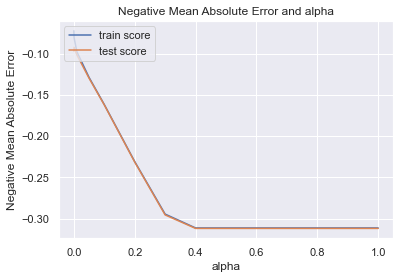

In [318]:


# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()



We will use a low value of alpha to balance the trade-off between Bias-Variance and to obtain the coefficients of the smallest of features. The aforementioned graph shows that the Negative Mean Absolute Error is relatively low at alpha = 0.4 and stabilises thereafter. 

In [320]:
# At alpha = 0.01, even the smallest of negative coefficients that have some predictive power towards 'SalePrice' have been generated

alpha = 0.01
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)
lasso.coef_

array([-0.01762557,  0.        ,  0.01487452,  0.13178962,  0.0445673 ,
        0.        ,  0.00640502,  0.        ,  0.01720631,  0.01410149,
        0.00545102,  0.        , -0.        ,  0.11710499,  0.02914233,
        0.        ,  0.02277985,  0.00168886,  0.        , -0.00362284,
        0.0246364 ,  0.04438247,  0.00161374,  0.00849449,  0.        ,
        0.        ,  0.        ,  0.00762994, -0.01976097, -0.08284822,
        0.        ,  0.        ,  0.00858809, -0.00039448,  0.        ,
       -0.        , -0.        ,  0.        ,  0.        , -0.        ,
        0.        , -0.        , -0.        , -0.        ,  0.        ,
        0.        , -0.        , -0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        ,  0.        , -0.        , -0.        ,
        0.        ,  0.        , -0.        ,  0.        , -0.        ,
       -0.        ,  0.        ,  0.        ,  0.        ,  0.  

 Lasso reduces the coefficients of unimportant characteristics to zero. 

In [321]:
# lasso model parameters
model_parameters = list(lasso.coef_ )
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 12.012),
 ('MSSubClass', -0.018),
 ('LotFrontage', 0.0),
 ('LotArea', 0.015),
 ('OverallQual', 0.132),
 ('OverallCond', 0.045),
 ('MasVnrArea', 0.0),
 ('BsmtFinSF1', 0.006),
 ('BsmtFinSF2', 0.0),
 ('TotalBsmtSF', 0.017),
 ('CentralAir', 0.014),
 ('1stFlrSF', 0.005),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', -0.0),
 ('GrLivArea', 0.117),
 ('BsmtFullBath', 0.029),
 ('BsmtHalfBath', 0.0),
 ('FullBath', 0.023),
 ('HalfBath', 0.002),
 ('BedroomAbvGr', 0.0),
 ('KitchenAbvGr', -0.004),
 ('Fireplaces', 0.025),
 ('GarageArea', 0.044),
 ('PavedDrive', 0.002),
 ('WoodDeckSF', 0.008),
 ('OpenPorchSF', 0.0),
 ('EnclosedPorch', 0.0),
 ('3SsnPorch', 0.0),
 ('ScreenPorch', 0.008),
 ('PoolArea', -0.02),
 ('PropertyAge', -0.083),
 ('MSZoning_FV', 0.0),
 ('MSZoning_RH', 0.0),
 ('MSZoning_RL', 0.009),
 ('MSZoning_RM', -0.0),
 ('LotShape_IR2', 0.0),
 ('LotShape_IR3', -0.0),
 ('LotShape_Reg', -0.0),
 ('LandContour_HLS', 0.0),
 ('LandContour_Low', 0.0),
 ('LandContour_Lvl', -0.0),
 ('LotConfig_CulD

In [322]:
# lasso regression
lm = Lasso(alpha=0.01)
lm.fit(X_train, y_train)

# prediction on the test set(Using R2)
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8620668055594433
0.8483311795689039


In [323]:
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

RMSE : 0.15475222586355813


In [324]:
mod = list(zip(cols, model_parameters))

In [325]:
para = pd.DataFrame(mod)
para.columns = ['Variable', 'Coeff']
para.head()

,Variable,Coeff
0,constant,12.012
1,MSSubClass,-0.018
2,LotFrontage,0.000
3,LotArea,0.015
4,OverallQual,0.132


In [326]:
para = para.sort_values((['Coeff']), axis = 0, ascending = False)
para

,Variable,Coeff
0,constant,12.012
4,OverallQual,0.132
14,GrLivArea,0.117
5,OverallCond,0.045
22,GarageArea,0.044
...,...,...
87,HouseStyle_2Story,-0.000
20,KitchenAbvGr,-0.004
1,MSSubClass,-0.018
29,PoolArea,-0.020


In [327]:
pred = pd.DataFrame(para[(para['Coeff'] != 0)])
pred

,Variable,Coeff
0,constant,12.012
4,OverallQual,0.132
14,GrLivArea,0.117
5,OverallCond,0.045
22,GarageArea,0.044
15,BsmtFullBath,0.029
21,Fireplaces,0.025
17,FullBath,0.023
9,TotalBsmtSF,0.017
3,LotArea,0.015


In [329]:
Lassso_var = list(pred['Variable'])
print(Lassso_var)

['constant', 'OverallQual', 'GrLivArea', 'OverallCond', 'GarageArea', 'BsmtFullBath', 'Fireplaces', 'FullBath', 'TotalBsmtSF', 'LotArea', 'CentralAir', 'MSZoning_RL', 'ScreenPorch', 'WoodDeckSF', 'BsmtFinSF1', '1stFlrSF', 'HalfBath', 'PavedDrive', 'KitchenAbvGr', 'MSSubClass', 'PoolArea', 'PropertyAge']


Ridge Regression

In [330]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [331]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=5]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.028211,0.020450,0.005478,0.000524,0.0001,{'alpha': 0.0001},-0.113225,-0.088929,-0.108834,-0.107347,...,-0.104126,0.008362,27,-0.070429,-0.075444,-0.072063,-0.062450,-0.071650,-0.070407,0.004312
1,0.017008,0.005523,0.005681,0.001792,0.001,{'alpha': 0.001},-0.113192,-0.088905,-0.108802,-0.107331,...,-0.104092,0.008362,26,-0.070430,-0.075447,-0.072064,-0.062450,-0.071654,-0.070409,0.004313
2,0.013802,0.000400,0.004198,0.000748,0.01,{'alpha': 0.01},-0.112877,-0.088669,-0.108497,-0.107187,...,-0.103775,0.008361,25,-0.070443,-0.075476,-0.072066,-0.062459,-0.071692,-0.070427,0.004319
3,0.011601,0.001019,0.004399,0.000800,0.05,{'alpha': 0.05},-0.111673,-0.087771,-0.107390,-0.106719,...,-0.102717,0.008351,24,-0.070513,-0.075624,-0.072098,-0.062566,-0.071841,-0.070529,0.004325
4,0.013004,0.002096,0.004597,0.001358,0.1,{'alpha': 0.1},-0.110446,-0.086986,-0.106472,-0.106310,...,-0.101815,0.008307,23,-0.070625,-0.075820,-0.072240,-0.062699,-0.071989,-0.070675,0.004342


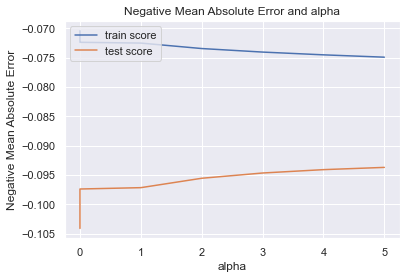

In [332]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [333]:
#We will use this for additional analysis because the Negative Mean Absolute Error stabilizes at alpha = 2. 
alpha = 2
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-1.21678194e-02, -8.12813406e-03,  2.56862949e-02,  7.89244978e-02,
        5.19578468e-02,  2.01802749e-03, -1.12399975e-02,  6.16166057e-03,
       -6.81198028e-03,  1.80452519e-02,  4.44813367e-02,  4.41228844e-02,
        2.09489876e-03,  6.94961687e-02,  2.83957578e-02,  2.47338147e-03,
        3.17193020e-02,  1.92208579e-02,  1.46264375e-02, -1.01809830e-02,
       -7.66704163e-03,  2.96254426e-02,  5.79682170e-03,  9.38141159e-03,
        4.64926894e-03,  1.10747387e-02,  5.43904521e-03,  1.22664799e-02,
       -1.47991761e-02, -4.07437065e-02,  1.25787159e-01,  1.36294882e-01,
        1.18852695e-01,  8.25024404e-02,  2.13287360e-02, -8.24913771e-02,
        4.78905980e-03,  1.89889863e-02,  3.58457234e-03,  1.91110557e-02,
        2.90668931e-02, -4.14544362e-02, -4.75376400e-02, -1.66224045e-02,
        1.08440908e-02, -6.23642888e-02, -4.33980777e-02, -5.59450132e-02,
        1.84058665e-02,  4.66730585e-02, -1.79517258e-02,  1.00325555e-01,
       -9.78739953e-02, -

In [334]:
# ridge model parameters
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 11.816),
 ('MSSubClass', -0.012),
 ('LotFrontage', -0.008),
 ('LotArea', 0.026),
 ('OverallQual', 0.079),
 ('OverallCond', 0.052),
 ('MasVnrArea', 0.002),
 ('BsmtFinSF1', -0.011),
 ('BsmtFinSF2', 0.006),
 ('TotalBsmtSF', -0.007),
 ('CentralAir', 0.018),
 ('1stFlrSF', 0.044),
 ('2ndFlrSF', 0.044),
 ('LowQualFinSF', 0.002),
 ('GrLivArea', 0.069),
 ('BsmtFullBath', 0.028),
 ('BsmtHalfBath', 0.002),
 ('FullBath', 0.032),
 ('HalfBath', 0.019),
 ('BedroomAbvGr', 0.015),
 ('KitchenAbvGr', -0.01),
 ('Fireplaces', -0.008),
 ('GarageArea', 0.03),
 ('PavedDrive', 0.006),
 ('WoodDeckSF', 0.009),
 ('OpenPorchSF', 0.005),
 ('EnclosedPorch', 0.011),
 ('3SsnPorch', 0.005),
 ('ScreenPorch', 0.012),
 ('PoolArea', -0.015),
 ('PropertyAge', -0.041),
 ('MSZoning_FV', 0.126),
 ('MSZoning_RH', 0.136),
 ('MSZoning_RL', 0.119),
 ('MSZoning_RM', 0.083),
 ('LotShape_IR2', 0.021),
 ('LotShape_IR3', -0.082),
 ('LotShape_Reg', 0.005),
 ('LandContour_HLS', 0.019),
 ('LandContour_Low', 0.004),
 ('LandCo

In [335]:
# ridge regression
lm = Ridge(alpha=2)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.922930613583609
0.8749717705191244


In [336]:
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

RMSE : 0.14050532711769997


In [337]:
# Create a dataframe for Ridge Coefficients
mod_ridge = list(zip(cols, model_parameters))

In [338]:
paraRFE = pd.DataFrame(mod_ridge)
paraRFE.columns = ['Variable', 'Coeff']
res=paraRFE.sort_values(by=['Coeff'], ascending = False)
res.head(20)

,Variable,Coeff
0,constant,11.816
32,MSZoning_RH,0.136
31,MSZoning_FV,0.126
33,MSZoning_RL,0.119
68,Neighborhood_StoneBr,0.103
204,SaleType_Oth,0.103
137,Foundation_Stone,0.101
97,Exterior1st_BrkFace,0.100
52,Neighborhood_Crawfor,0.100
113,Exterior2nd_CmentBd,0.087


In [339]:
paraRFE = paraRFE.sort_values((['Coeff']), axis = 0, ascending = False)
paraRFE


,Variable,Coeff
0,constant,11.816
32,MSZoning_RH,0.136
31,MSZoning_FV,0.126
33,MSZoning_RL,0.119
68,Neighborhood_StoneBr,0.103
...,...,...
81,BldgType_Twnhs,-0.094
53,Neighborhood_Edwards,-0.098
85,HouseStyle_2.5Fin,-0.098
96,Exterior1st_BrkComm,-0.103


It is better to utilise Lasso since it comes in and gives a zero value to irrelevant features, allowing us to pick the predictive variables, even if the model performance using Ridge Regression was higher in terms of R2 values of Train and Test.
It is always advisable to use simple yet robust model.

The advice for Housing company is to monitor these variables that have an impact on the price of the home.
- Higher positive coeficient values imply a higher sale price. 
OverallQual 	0.132
GrLivArea 	0.117
OverallCond 	0.045
GarageArea 	0.044
BsmtFullBath 	0.029
- The higher values of negative coeeficients suggest a decrease in sale value.
PropAge ,MSSubClass